# Data Analysis and Visualization for Best Books in the 2000's Decade

Our boss wants to publish new book and she wants  to be in best books on [**goodread!**](https://www.goodreads.com)

We will guide her with analysing books of data from good read.But first lets look at what is our approach;

Publishing a **book** in a world where media is consumed at less than 30 second chunks can be bit of a gamble!!

But with mountains of data at our disposal it is possible to weigh the odds in our favour **if we know how to read it the right way**

#### Here we will be guiding you step by step through the process of:

        1. Scraping The Data

        2. Data Preparation

        3. Pre-Conclusions

        4. Analyzing the Data/Visualizing The Data and Conclusions


#### To finally be able to give some insights in to what makes a great book a great book!

        
![image](images/test1.jpg)

## 1. Scraping The Data

We used **BeautifulSoup** for scraping the data. So, let's make a Soup;

```python
def get_data(url):
    source = s.get(url).text
    soup = BeautifulSoup(source, 'lxml')
    return soup
```
This is another Python function that allows us to go to the place where our data is and together with a couple more of its friends are able to get the data from our friends at **GOODREADS**.

And the best part is:
** We can do it when and as many times(conditions may apply) as we want to!!**

In this case we scraped **Best 1000 books from 2000s Decade!**

[*Here how I did it!*](https://github.com/aktumut/Data_Analysis_Goodreads/blob/main/Web_Scraping.ipynb)

##  2. Data Preparation
1. Importing Libraries and Data
2. Understanding Data Set
3. Pre-Visualisation
4. Data Cleaning
5. Normalising-Scaling The Data

#### 1.Importing Libraries and Data

In [4]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib as mpl #plotting
import matplotlib.pyplot as plt #plotting 
import re #regex

In [16]:
#Importing Data
def importing_data():
    df=pd.read_csv("data/data.csv")
    return df
    
df=importing_data()

#### 2.Understanding Data Set

In [17]:
#Showing first 5 row of dataset
df.head()

,URL,Title,Author,Number of Ratings,Number of Reviews,Average Ratings,Number of Pages,Published Year,Series,Genres,Awards,Places
0,https://www.goodreads.com/book/show/136251.Har...,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,2959601.0,68457.0,4.6,759.0,2007.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Locus Award Nominee for Best Young Adult Nov...,"[['London, England', '(United Kingdom)'], ['Ho..."
1,https://www.goodreads.com/book/show/2767052-th...,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,6685627.0,175504.0,4.3,374.0,2008.0,1.0,"['Young Adult', 'Fiction', 'Dystopia']",['Locus Award Nominee for Best Young Adult Boo...,"[['District 12, Panem', 'Capitol, Panem', 'Pan..."
2,https://www.goodreads.com/book/show/1.Harry_Po...,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,2575456.0,42018.0,4.5,652.0,2006.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Locus Award Nominee for Best Young Adult Nov...,[['Hogwarts School of Witchcraft and Wizardry'...
3,https://www.goodreads.com/book/show/6.Harry_Po...,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,2750013.0,49585.0,4.5,734.0,2002.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']","['Hugo Award for Best Novel (2001)', ""Mythopoe...","[['Hogwarts School of Witchcraft and Wizardry,..."
4,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,2653494.0,45376.0,4.5,870.0,2004.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Bram Stoker Award for Works for Young Reader...,[['Hogwarts School of Witchcraft and Wizardry'...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   URL                1000 non-null   object 
 1   Title              1000 non-null   object 
 2   Author             1000 non-null   object 
 3   Number of Ratings  995 non-null    float64
 4   Number of Reviews  995 non-null    float64
 5   Average Ratings    978 non-null    float64
 6   Number of Pages    992 non-null    float64
 7   Published Year     994 non-null    float64
 8   Series             995 non-null    float64
 9   Genres             992 non-null    object 
 10  Awards             1000 non-null   object 
 11  Places             671 non-null    object 
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


We have 12 different columns which can be categorical or numerical data in our data set. Also, we can say that there are some non-values that we should take care of! Let's check how big they are.

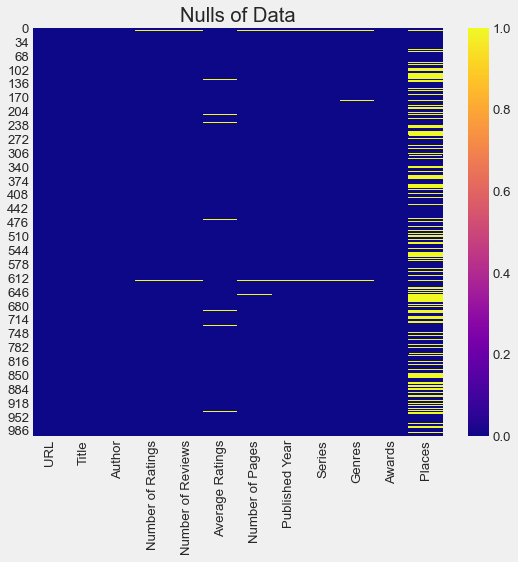

In [19]:
#Heat map of null cells
def plotting_null_data():
    fig = plt.figure(figsize=(18,7))
    fig.add_subplot(121)
    plt.title('Nulls of Data')
    sns.heatmap(df.isnull(), cmap='plasma')
    return plt.show()
plotting_null_data()

In [20]:
print("Percentage of Null Values")
missing_percentage = df.isnull().sum() * 100 / len(df) #Calculating percentage of missing values
missing_percentage

Percentage of Null Values


URL                   0.0
Title                 0.0
Author                0.0
Number of Ratings     0.5
Number of Reviews     0.5
Average Ratings       2.2
Number of Pages       0.8
Published Year        0.6
Series                0.5
Genres                0.8
Awards                0.0
Places               32.9
dtype: float64

We have pretty less null value in our data set. Only "Places" have 32% null value.

Lets look at **basic statistical information** of our data set.

In [21]:
df.describe()

,Number of Ratings,Number of Reviews,Average Ratings,Number of Pages,Published Year,Series
count,9.950000e+02,995.000000,978.000000,992.000000,994.00000,995.000000
mean,1.815787e+05,7786.791960,3.929346,412.304435,2006.05332,0.510553
std,4.269193e+05,13021.106839,0.253346,216.892706,2.64026,0.500140
min,1.500000e+01,0.000000,3.000000,6.000000,1998.00000,0.000000
25%,2.989800e+04,1796.000000,3.800000,302.000000,2004.00000,0.000000
50%,7.196400e+04,3669.000000,3.900000,374.000000,2006.00000,1.000000
75%,1.567095e+05,7983.000000,4.100000,472.250000,2008.00000,1.000000
max,6.685627e+06,175504.000000,4.800000,4100.000000,2018.00000,1.000000


Here is the results;
* The mean value and maximum and minimum values of the **Number of Ratings** differences are too big! That means we should **normalize** this column.
* The mean value and maximum and minimum values of the **Number of Reviews** differences are too big! That means we should **normalize** this column.
* The mean value and maximum and minimum values of the **Average Ratings** differences are too close! That means we should **scale** this column, for better visualizing and understanding the distributions.
* The mean value and maximum and minimum values of the **Number of Pages** differences are too big! That means we should **normalize** this column.
* We can count **Year** and **Series** columns as **categorical** data. 


#### 3. Pre-Visualisation

**Distributions of Numerical Data**

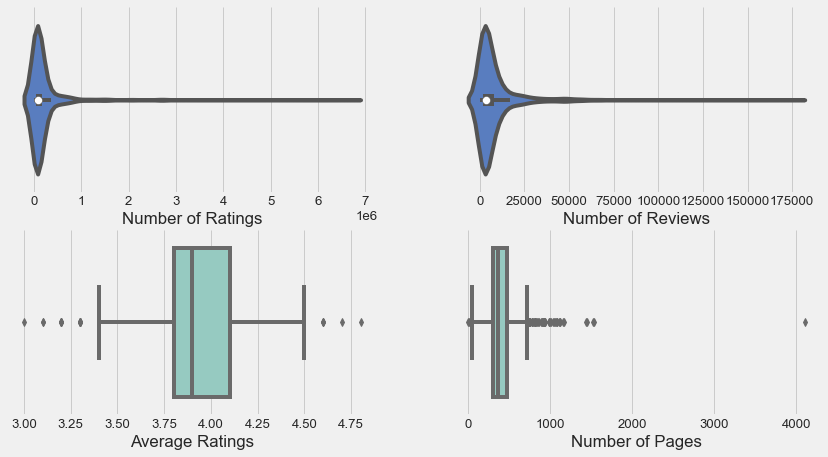

In [22]:
numerical_features = ['Average Ratings', 'Number of Pages','Number of Ratings', 'Number of Reviews', ]

plt.figure(figsize=(13, 7))
sns.set(font_scale= 1.2)
plt.style.use('fivethirtyeight')
sns.color_palette("mako", as_cmap=True)

for i, feature in enumerate(numerical_features[0:2]):
    plt.subplot(2, 2, i+3)
    sns.boxplot(x=df[feature],palette="Set3")

for i, feature in enumerate(numerical_features[2:5]):
    plt.subplot(2,2 , i+1)
    sns.violinplot(x=df[feature],palette="muted") 
sns.despine()


Here are conclusions;
* **Number of Ratings** have big distributions between 0 to 2
* **Average Ratings** mostly stuck in 3.8 to 4.2 
* **Number of Reviews** have big distributions between 0 to 73000
* **Number of Pages** have separated values between 300 to 1200

**Distributions**

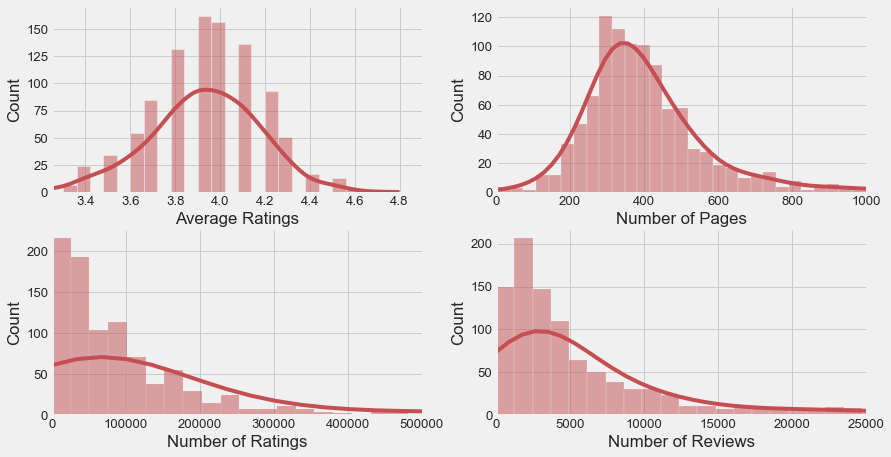

In [23]:
x_limite=[[3.25,4.9],[0,1000],[0,500000],[0,25000]]
plt.figure(figsize=(13, 7))
sns.set(font_scale= 1.2)
plt.style.use('fivethirtyeight')
sns.color_palette("mako", as_cmap=True)

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df[feature], kde=True,color="r")
    plt.xlim(x_limite[i])
sns.despine()


Conclusion of histogram plots;
* Most of the books of **Average Ratings** are between 3.8 to 4.2, Additionlly this feature has **normal distrubition**
* **Number of Pages** has **left-skewed distribution**
* **Number of Ratings** and **Number of Reviews** have  **right-skewed distribution **

#### 4.Data Cleaning

#### Filling the null data 
There are a lot of approaches for filling the data.
* For filling numerical data we will use mean values 
* For filling categorical data we will use mode values

**Filling numerical data**


In [24]:
#Filling numerical data of Number of Ratings
df['Number of Ratings'] = df['Number of Ratings'].fillna(df['Number of Ratings'].mean())
#Filling numerical data of Number of Reviews
df['Number of Reviews'] = df['Number of Reviews'].fillna(df['Number of Reviews'].mean())
#Filling numerical data of Average Ratings
df['Average Ratings'] = df['Average Ratings'].fillna(df['Average Ratings'].mean())
#Filling numerical data of Number of Pages
df['Number of Pages'] = df['Number of Pages'].fillna(df['Number of Pages'].mean())

**Filling categorical data**

In [25]:
#Filling categorical data of Published Year
df['Published Year'] = df['Published Year'].fillna(df['Published Year'].mode()[0])
#Filling categorical data of Series
df['Series'] = df['Series'].fillna(df['Series'].mode()[0])
#Filling categorical data of Genres
df['Genres'] = df['Genres'].fillna(df['Genres'].mode())
#Filling categorical data of Places
df['Places'] = df['Places'].fillna(df['Places'].mode()[0])

Lets look at last status of data set

In [26]:
print("Percentage of Updated Null Values")
missing_percentage_updated = df.isnull().sum() * 100 / len(df) #Calculating percentage of missing values
missing_percentage_updated

Percentage of Updated Null Values


URL                  0.0
Title                0.0
Author               0.0
Number of Ratings    0.0
Number of Reviews    0.0
Average Ratings      0.0
Number of Pages      0.0
Published Year       0.0
Series               0.0
Genres               0.8
Awards               0.0
Places               0.0
dtype: float64

Now we don't have any missing values!



#### Data Cleaning

We need to interest with empty brackets and format problems

**Lets create general pattern of regex used for cleaning the data**

These scripts clean the string data in the Dataframe and makes the usable for data analysis

In [27]:
pattern = re.compile(r'(\[|\]|\'|\")+')
pattern2 = re.compile(r'(\\n|...more)+')

**Transforming the column awards into a numerical column, containing only the numbers of awards (if any) won by the novel**


In [28]:
awards_no = []

for i, j in df['Awards'].items():
    if j is np.nan:
        j = np.nan
    else:
        j = re.sub(pattern, '', j)
        if len(j) > 5:
            j = re.sub(pattern2, ',', j).split(',')
            j = len(j)
        else:
            j = np.nan
    awards_no.append(j)


df['Awards_no'] = awards_no

**Modifying the Genres column values to make in to a list.**


In [29]:
genres_l = []
genres_freq = {}
for i, j in df['Genres'].items():
    j = re.sub(pattern, '', str(j)).split(',')
    for word in j:
        if word in genres_freq:
            genres_freq[word] += 1
        else:
            genres_freq[word] = 1
    genres_l.append(j)

df['Genres'] = genres_l
#print(genres_freq)


**Cleaning the Setting data and makes it usable.**

In [30]:
places = []
places_freq = {}
for i, j in df['Places'].items():
    if j is np.nan:
        j = np.nan
    elif len(j) > 5:
        j = re.sub(pattern2, '', j)
        j = re.sub(pattern, '', j).strip('').split(',')
        for word in j:
            if word in places_freq:
                places_freq[word] += 1
            else:
                places_freq[word] = 1
    else:
        j = np.nan
    places.append(j)

df['Places'] = places
#print(places_freq)

**Lets look at last form of the data frame!**

In [31]:
df.head()

,URL,Title,Author,Number of Ratings,Number of Reviews,Average Ratings,Number of Pages,Published Year,Series,Genres,Awards,Places,Awards_no
0,https://www.goodreads.com/book/show/136251.Har...,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,2959601.0,68457.0,4.6,759.0,2007.0,1.0,"[Fantasy, Young Adult, Fiction]",['Locus Award Nominee for Best Young Adult Nov...,"[London, England, (United Kingdom), Hogwart...",8.0
1,https://www.goodreads.com/book/show/2767052-th...,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,6685627.0,175504.0,4.3,374.0,2008.0,1.0,"[Young Adult, Fiction, Dystopia]",['Locus Award Nominee for Best Young Adult Boo...,"[District 12, Panem, Capitol, Panem, Panem...",41.0
2,https://www.goodreads.com/book/show/1.Harry_Po...,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,2575456.0,42018.0,4.5,652.0,2006.0,1.0,"[Fantasy, Young Adult, Fiction]",['Locus Award Nominee for Best Young Adult Nov...,"[Hogwarts School of Witchcraft and Wizardry, ...",3.0
3,https://www.goodreads.com/book/show/6.Harry_Po...,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,2750013.0,49585.0,4.5,734.0,2002.0,1.0,"[Fantasy, Young Adult, Fiction]","['Hugo Award for Best Novel (2001)', ""Mythopoe...","[Hogwarts School of Witchcraft and Wizardry, 1...",9.0
4,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,2653494.0,45376.0,4.5,870.0,2004.0,1.0,"[Fantasy, Young Adult, Fiction]",['Bram Stoker Award for Works for Young Reader...,"[Hogwarts School of Witchcraft and Wizardry, ...",9.0


#### 5. Normalising-Scaling The Data

**Creating General Function for Min-Max Normalising**

In [32]:
def min_max(column):
    """ Returns the Min-Max normalised values for the average ratings value.
    Can filter elements greater than a given threshhold value i.e. the artificial minimum"""
    column = ((column - column.min()) / column.max() - column.min()) 
    return column

**Min-Max Normalising Number of Ratings**

In [33]:
df_normalised=df
df_normalised["Number of Ratings"]=min_max(df_normalised["Number of Ratings"])

**Min-Max Normalising Number of Reviews**

In [34]:
df_normalised["Number of Reviews"]=min_max(df_normalised["Number of Reviews"])

**Min-Max Normalising Number of Pages**

In [35]:
df_normalised["Number of Pages"]=min_max(df_normalised["Number of Pages"])

**Scaling 0 to 10 Average Ratings**

In [36]:
df_normalised["Average Ratings"]=2*df_normalised["Average Ratings"]

## 3. Pre-Conclusions


** Plotting Number of Reviews and Ratings by Year**

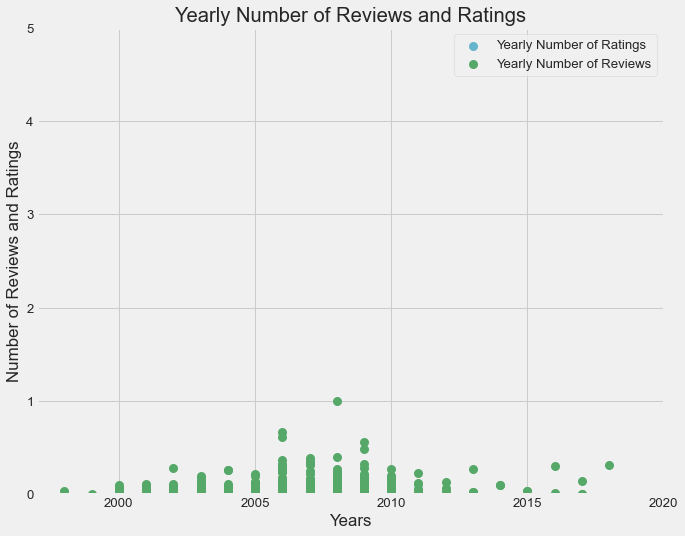

In [51]:
y=df[['Number of Ratings','Number of Reviews']].copy()
numbers = [['Number of Ratings','c','Yearly Number of Ratings'],
    ['Number of Reviews','g','Yearly Number of Reviews']]

fig, ax = plt.subplots(figsize=(10,8))
for number in numbers:
    plt.scatter(df["Published Year"],y[number[0]],color=number[1],label=number[2],marker='o',linewidth=3)
    plt.ylim(0,5)
    plt.xlim(1997,2020)
    
plt.xlabel('Years')
plt.ylabel('Number of Reviews and Ratings')
plt.title('Yearly Number of Reviews and Ratings')
plt.legend()




In this plot, We can say that the density of publishing books is **highly getting intense between 2000 to 2010**

This can say to us, **in last decade there are very few books succeeded to be in best books list!**

Places feature visualization

## 4. Analyzing the Data/Visualizing The Data and Conclusions
1. Correlation Map
2. Data Distributions
3. Analyzing of the Interesting Data

### 1.Correlation Map

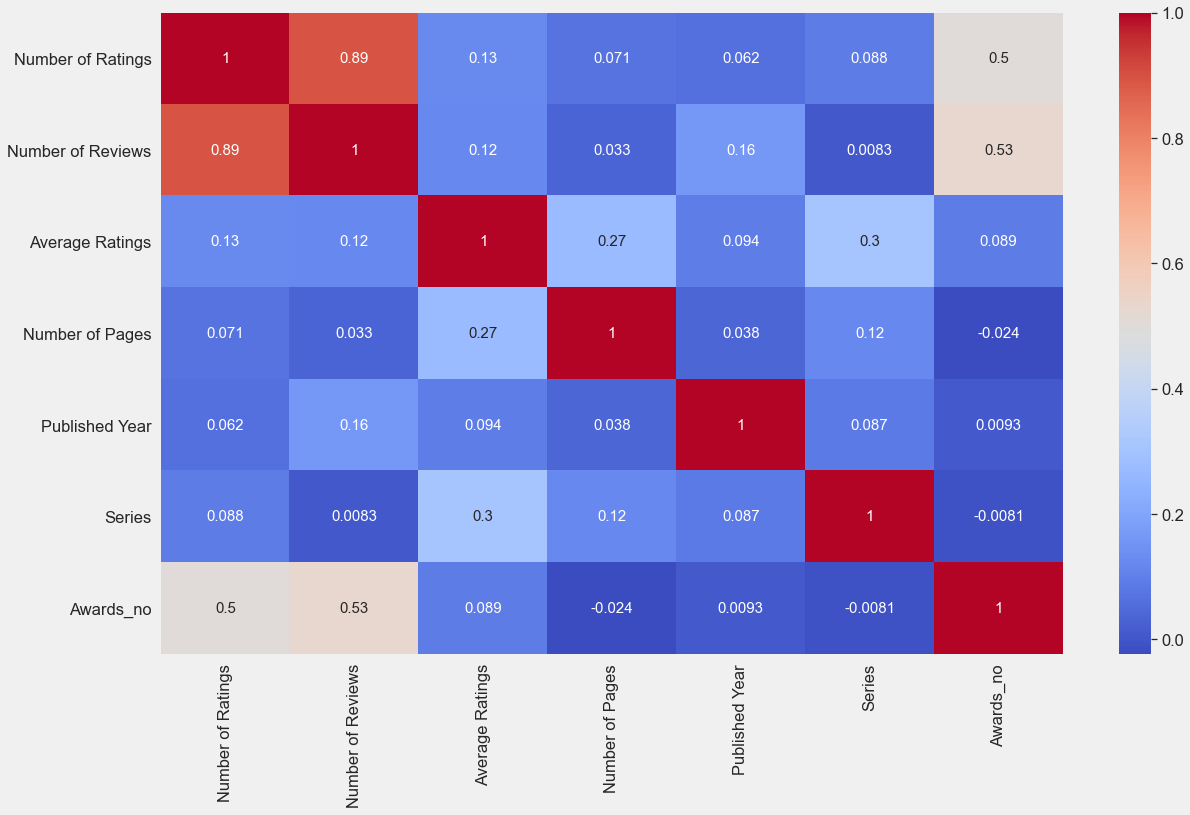

In [38]:
#Creating heat map
plt.figure(figsize=(18,11))
sns.set(font_scale=1.5)
sns.set_style('white')
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={'size':15})
plt.show()

1. The most significant correlation that appears here is the **Number of Ratings** and **Number of Reviews** they are obviously co-related positively.
2. **Average Rattings** slightly co-relates positively with some other fields like:
    * Number of pages 
    * Whether it's a series or not 
    


### 2.Data Distributions

**Effect of Number of Reviews on Average Ratings **

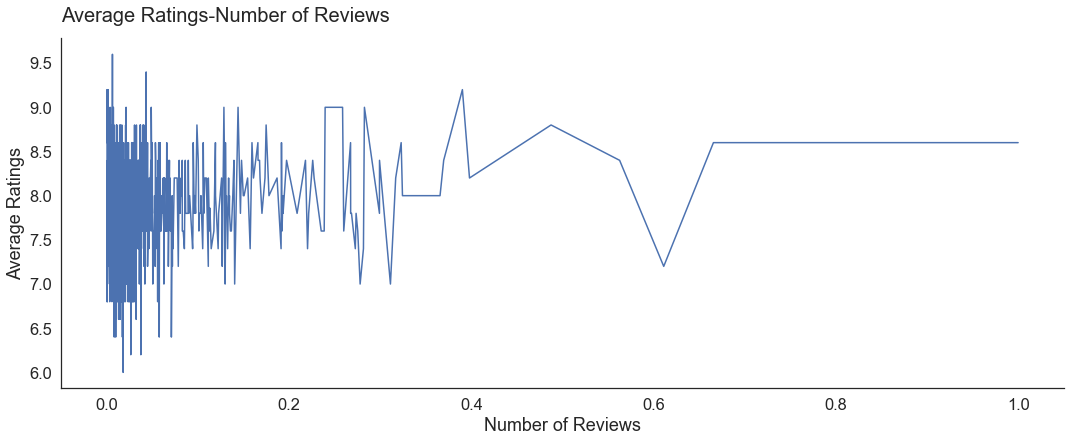

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.lineplot(data=df, x=df['Number of Reviews'], y=df_normalised['Average Ratings'],
            markers=True, dashes=False)

ax.set_title('Average Ratings-Number of Reviews', size=20, loc='Left', y=1.03)

sns.despine()
plt.show()

We know from the heat map that the correlation between these features was 0.12. Basically, that means they are affecting each other positively at a very low rate.

In this line plot;
* We see that having a low review can cause a very high or low average rate!
* Increasing of number of reviews scaling Average Ratings between 4.5 to 3.5 until 25000 reviews 
* Between 25000 to around 40000 reviews ratings are between 4.25 to 3.75 
* After 60000 reviews ratings are acting very independently individually

**Effect of Number of Reviews on Number of Ratings **

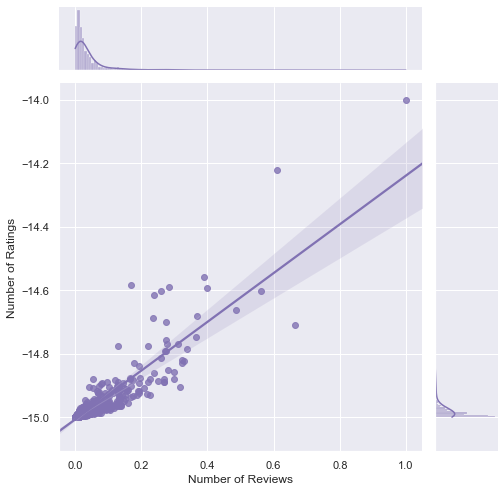

In [40]:
sns.set_theme(style="darkgrid")
sns.jointplot(x=df_normalised['Number of Reviews'], y=df_normalised['Number of Ratings'], 
                data=df_normalised,kind="reg", truncate=False,
                color="m", height=7)


In the heat map, this correlation was very positively high **0.89**. We were expecting that there will be a linear correlation. So that's why we used a linear regression plot here! Also, we used normalized data.


**Being part of series or not effect on all numerical data**

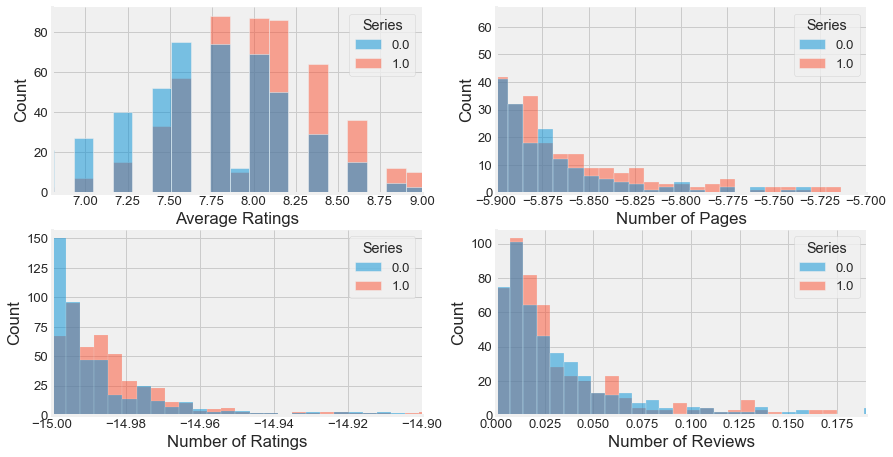

In [41]:
#Creating limits for better visualization
x_limits=[[6.8, 9],[-5.9, -5.7],[-15, -14.9],[0, 0.19]]

plt.figure(figsize=(13, 7))
sns.set(font_scale= 1.2)
plt.style.use('fivethirtyeight')
sns.color_palette("rocket", as_cmap=True)

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df_normalised[feature], hue=df['Series']) 
    plt.xlim(x_limits[i]) 
sns.despine()

Conclusion of having series;
* We can definitely say that **after 8 average ratings having series have a good effect on Average Ratings at count perspective**
* For the rest of the numerical data, we can say **having series doesn't affect count roughly**